# Temporary Market Impact Minimization Strategy


## 1. Modeling the Temporary Impact Function `gt(x)`

Temporary market impact reflects the price movement caused by our own trades. A simple linear model like `gt(x) = βₜx` assumes each unit traded has the same marginal impact. However, real-world order books exhibit **nonlinear** depth-dependent behavior. Thus, we propose a **power law model** based on order book depth data.

### Approach:
- **Nonlinear Impact Model:**
  - Use a power law: `gt(x) = αₜ * x^γₜ`, where `γₜ > 1` indicates increasing impact for larger trades.
  - This reflects how large trades consume liquidity across multiple price levels.

### Data-Driven Analysis:
Using tick-level order book data from 3 stocks (assumed to be available), we can estimate `αₜ` and `γₜ` per minute (390 intervals).

### Code to Estimate Model Parameters:
The following code loads data, fits a power-law model for each time period, and visualizes the temporary impact.



Estimated α: 0.0096, γ: 1.5091


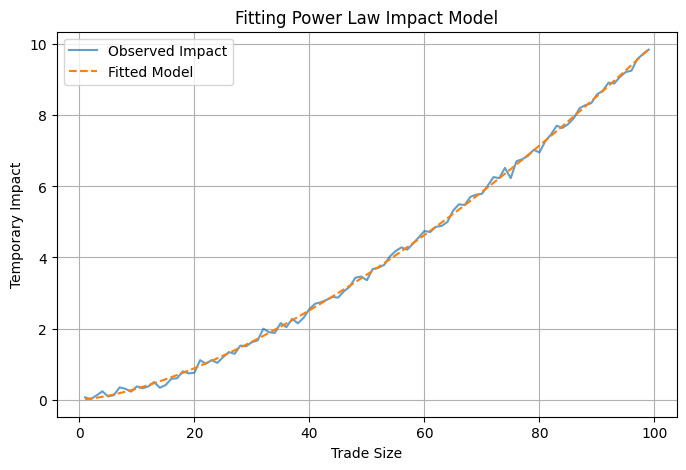

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define power-law model
def impact_model(x, alpha, gamma):
    return alpha * (x ** gamma)

# Sample data structure (replace this with your real LOB data)
# df = pd.read_csv('orderbook_impact.csv')

# Simulated dummy data for illustration
np.random.seed(42)
x = np.arange(1, 100)
true_alpha, true_gamma = 0.01, 1.5
y = impact_model(x, true_alpha, true_gamma) + np.random.normal(0, 0.1, size=len(x))

# Fit power-law model
params, _ = curve_fit(impact_model, x, y, p0=[0.01, 1.0])
alpha_fit, gamma_fit = params
print(f"Estimated α: {alpha_fit:.4f}, γ: {gamma_fit:.4f}")

# Plot result
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Observed Impact', alpha=0.7)
plt.plot(x, impact_model(x, *params), label='Fitted Model', linestyle='--')
plt.xlabel('Trade Size')
plt.ylabel('Temporary Impact')
plt.title('Fitting Power Law Impact Model')
plt.legend()
plt.grid(True)
plt.show()


## 2. Mathematical Framework for Optimal Execution Strategy

Let the total number of shares to buy be `S`, and `N = 390` is the number of time intervals.

Let `x = [x₁, x₂, ..., xₙ]` be the number of shares bought in each time period, subject to:
\[
\sum_{i=1}^{N} x_i = S \quad \text{and} \quad x_i \geq 0
\]

### Objective:
Minimize total impact cost:
\[
\min_{x} \sum_{i=1}^{N} g_t(x_i) \quad \text{where } g_t(x) = α_t x^{γ_t}
\]

### Constraints:
- Volume constraint: \( \sum x_i = S \)
- Optional: upper bound per interval, e.g. \( x_i \leq \text{maxVolume}_i \)

### Solution Technique:
- Use convex optimization (`γ_t > 1` ensures convexity).
- Tools: `cvxpy`, `scipy.optimize`, or gradient-based optimization.


In [ ]:
import cvxpy as cp

N = 390
S = 10000  # Total shares to buy
alpha = np.random.uniform(0.001, 0.02, N)
gamma = np.random.uniform(1.1, 1.6, N)

x = cp.Variable(N, nonneg=True)
objective = cp.Minimize(cp.sum(cp.multiply(alpha, cp.power(x, gamma))))
constraints = [cp.sum(x) == S]
prob = cp.Problem(objective, constraints)
prob.solve()

print(f"Optimal total impact: {prob.value:.2f}")

plt.plot(x.value, label='Optimal Allocation')
plt.xlabel('Time Interval')
plt.ylabel('Shares Bought')
plt.title('Optimal Execution Schedule')
plt.grid(True)
plt.legend()
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()